In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [2]:
digits = datasets.load_digits()

In [3]:
digits.images.shape

(1797, 8, 8)

In [4]:
digits.images[0, :, :]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [5]:
set(digits.target)

{np.int64(0),
 np.int64(1),
 np.int64(2),
 np.int64(3),
 np.int64(4),
 np.int64(5),
 np.int64(6),
 np.int64(7),
 np.int64(8),
 np.int64(9)}

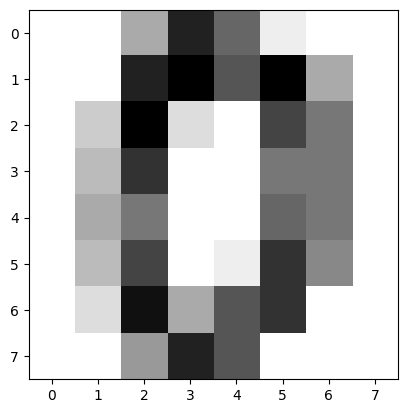

In [6]:
plt.figure()
plt.imshow(digits.images[0], cmap=plt.cm.binary)
plt.grid(False)
plt.show()

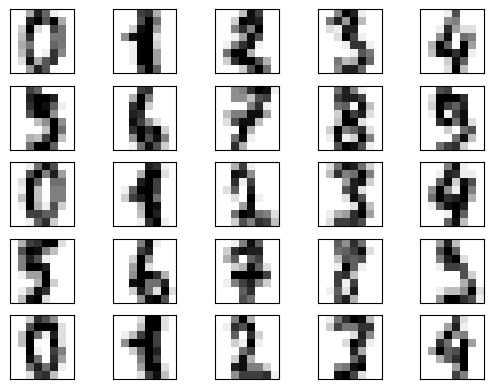

In [7]:
plt.figure()
for i in range(25):
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(digits.images[i], cmap = plt.cm.binary)
plt.show()

In [8]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
data.shape

(1797, 64)

In [10]:
x_train, x_test, y_train, y_test = train_test_split(
    data,
    digits.target,
    test_size=0.5,
    shuffle=False
)

In [11]:
from sklearn.linear_model import LogisticRegression

estimator = LogisticRegression(max_iter=1000)
estimator

LogisticRegression(max_iter=1000)

In [12]:
estimator.fit(
    x_train,
    y_train
)

LogisticRegression(max_iter=1000)

In [13]:
estimator.intercept_

array([ 0.00050529, -0.07018716,  0.00037915,  0.02613524,  0.00701811,
       -0.01338732, -0.00226943,  0.01159971,  0.02821911,  0.01198729])

In [14]:
from sklearn.metrics import accuracy_score

accuracy_score(y_true=y_train, y_pred=estimator.predict(x_train))

1.0

In [15]:
predictions = estimator.predict(x_test)
predict_prob = estimator.predict_proba(x_test)

accuracy_score(y_true=y_test, y_pred=predictions)

0.92880978865406

[[84  0  0  0  1  0  3  0  0  0]
 [ 0 82  0  1  0  1  0  0  2  5]
 [ 0  0 84  2  0  0  0  0  0  0]
 [ 0  0  0 76  0  4  0  2  7  2]
 [ 0  0  0  0 84  0  4  0  0  4]
 [ 0  2  0  0  0 85  1  0  0  3]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  1  1  0 85  0  2]
 [ 0  3  1  0  0  4  1  0 79  0]
 [ 1  0  0  2  0  2  0  0  1 86]]


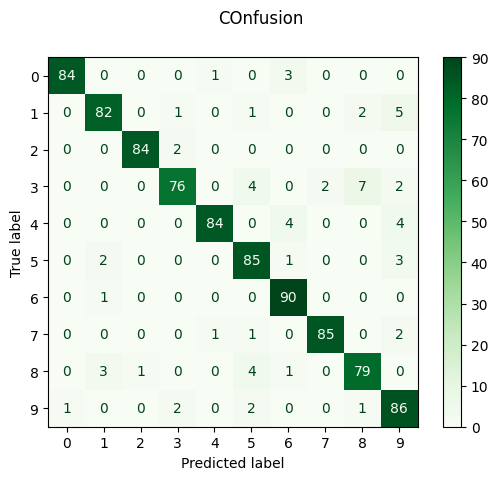

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay.from_predictions(
    y_test,
    predictions,
    cmap="Greens"
)

disp.figure_.suptitle("COnfusion")
print(disp.confusion_matrix)

In [ ]:
import pickle

with open("estimator.pickle", "wb") as file:
    pickle.dump(estimator, file)